**Логистическая регрессия. Методы оптимизации**

# Теория

**Функция** потерь логистической регрессии: $L(x) = \frac{1}{m} \sum_{i=1}^{m} ln(1 + exp(-b_i * a_i^Tx)) + \frac{\lambda}{2}||x||_2^2$

**Функция** потерь в матрично-векторном виде: $L(x) = \frac{1}{m} ln\left(1 + \exp(-B \cdot (A^T x))\right) + \frac{\lambda}{2} ||x||_2^2 $

--------------
Воспользуемся основными правилами матричн-векторного дифференцирования:

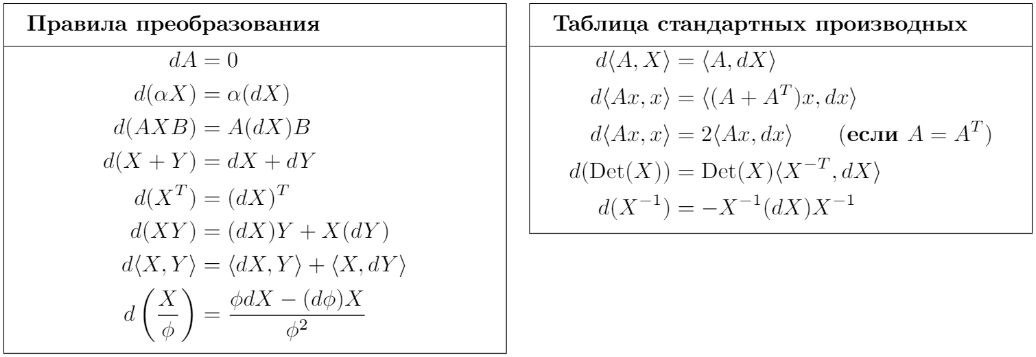

$\nabla{f(X)} = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ... , \frac{\partial f}{\partial x_n})$, где $X=(x_1, ... , x_n)$

--------------
**Градиент** логистической функции потерь: $\nabla L(x) = \frac{1}{m} \sum_{i=1}^{m} \sigma(-b_i * a_i^Tx) * (-b_i * a_i^Tx) + \lambda x, \text{  где  } \sigma(z) = \frac{1}{1 + exp(-z)}$

**Градиент** в матрично-векторном виде: $\nabla L(x) = \frac{1}{m} A^T \left(\sigma(-B \cdot (A^T x)) \circ (-B)\right) + \lambda x$

--------------

**Гессиан** логистической функции потерь: $\nabla^2 L(x) = \frac{1}{m} A^T*D(x)*A + \lambda I, \text{  где  } D(x) = diag[\sigma(b_i * a_i^Tx)*(1-\sigma(b_i * a_i^Tx))]$

# Эксперименты

In [1]:
import pandas as pd
import numpy as np
import scipy
import time
from scipy.special import expit
import scipy.sparse
import matplotlib.pyplot as plt
from plot_trajectory_2d import plot_trajectory, plot_levels
from oracles import create_log_reg_oracle, QuadraticOracle
from optimization import gradient_descent, newton

import warnings
warnings.filterwarnings("ignore")

## Эксперимент 1

В данном эксперименте исследуем траекторию градиентного спуска на квадратичной функции
$$f(x) = \frac{1}{2}<Ax, x> - <b, x>$$

In [138]:
def experiment1(A1, b1, A2, b2, A3, b3, x0, max_iter, line_search_options):

    # инициализация оракулов
    oracle1 = QuadraticOracle(A1, b1)
    oracle2 = QuadraticOracle(A2, b2)
    oracle3 = QuadraticOracle(A3, b3)

    # записаь траектории [x]
    history1 = gradient_descent(oracle=oracle1, x_0=x0, max_iter=max_iter, line_search_options=line_search_options, trace=True)[2]
    history2 = gradient_descent(oracle=oracle2, x_0=x0, max_iter=max_iter, line_search_options=line_search_options, trace=True)[2]
    history3 = gradient_descent(oracle=oracle3, x_0=x0, max_iter=max_iter, line_search_options=line_search_options, trace=True)[2]

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    plt.sca(axs[0])
    plot_levels(oracle1.func, xrange=[-8, 8], yrange=[-8, 8])
    plot_trajectory(oracle1, history1['x'], label="Function 1")
    axs[0].set_title("Function 1")

    plt.sca(axs[1])
    plot_levels(oracle2.func, xrange=[-8, 8], yrange=[-8, 8])
    plot_trajectory(oracle2, history2['x'], label="Function 2")
    axs[1].set_title("Function 2")

    plt.sca(axs[2])
    plot_levels(oracle3.func, xrange=[-8, 8], yrange=[-8, 8])
    plot_trajectory(oracle3, history3['x'], label="Function 3")
    axs[2].set_title("Function 3")

    plt.tight_layout()
    plt.show()

Рассмотрим следующие 3 функции:

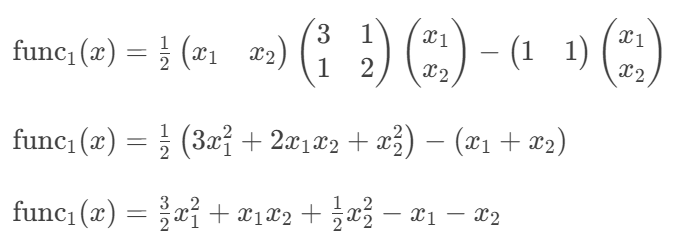

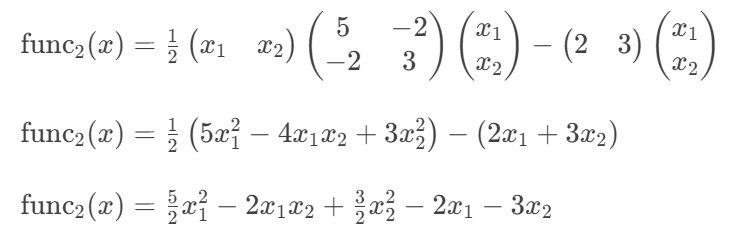

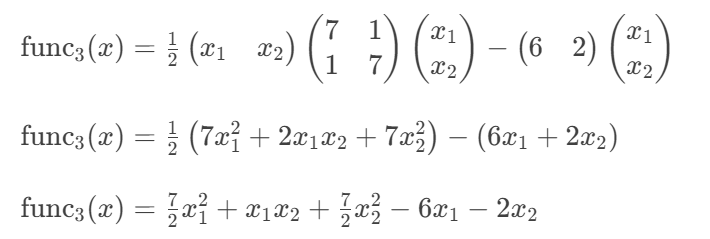

In [142]:
A1 = np.array([[3, 1], [1, 2]])
b1 = np.array([1, 1])

A2 = np.array([[5, -2], [-2, 3]])
b2 = np.array([2, 3])

A3 = np.array([[7, 1], [1, 7]])
b3 = np.array([6, 2])

### Константная стратегия

Для первого эксперимента возьмем начальную точку, которая находится далеко от искомого минимума на каждой из трех функций - точку (5, 5):

Рассмотрим функции и их сходимость в случае константной стратегии


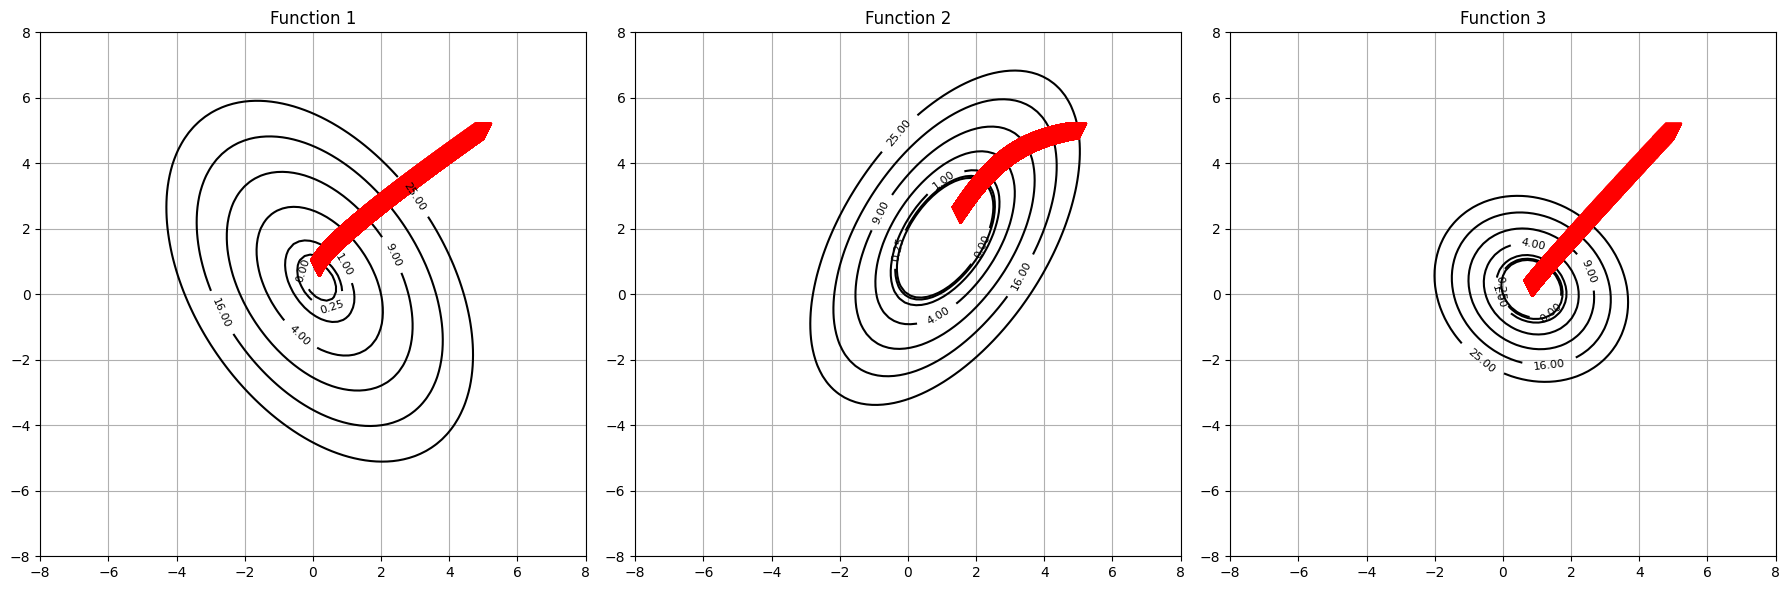

CPU times: total: 609 ms
Wall time: 1.23 s


In [140]:
%%time

x0 = np.array([5, 5])
print('Рассмотрим функции и их сходимость в случае константной стратегии')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Constant', 'c': 1e-4})

Теперь возьмем х0, приближенное к экстремуму:

Рассмотрим функции и их сходимость в случае константной стратегии


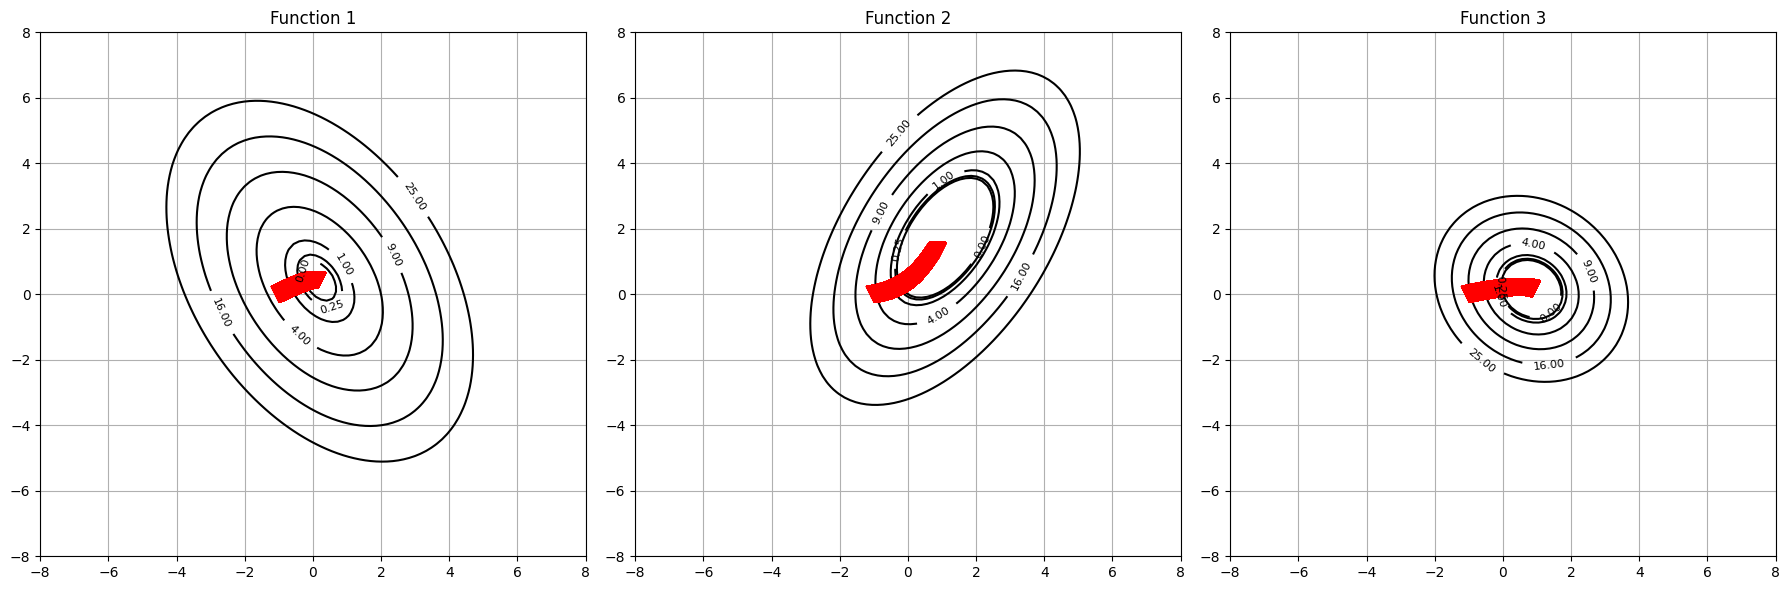

CPU times: total: 844 ms
Wall time: 1.14 s


In [143]:
%%time

x0 = np.array([-1, 0])
print('Рассмотрим функции и их сходимость в случае константной стратегии')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Constant', 'c': 1e-4})

### Армихо

По аналогии с константной стратегией сначала возьмем начальную точку, которая находится далеко от искомого минимума на каждой из трех функций:

Рассмотрим функции и их сходимость в случае константной стратегии


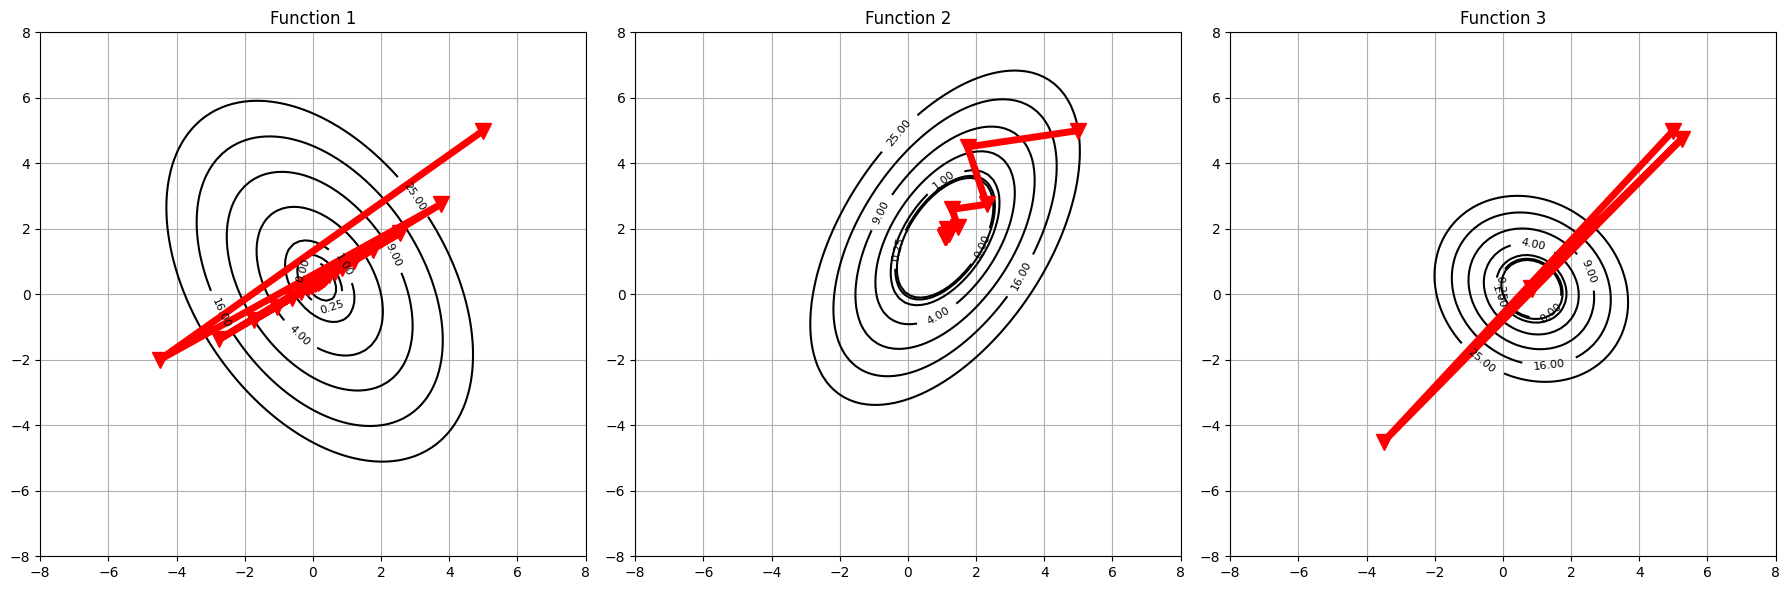

CPU times: total: 547 ms
Wall time: 1.3 s


In [145]:
%%time

x0 = np.array([5, 5])
print('Рассмотрим функции и их сходимость в случае константной стратегии')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Armijo', 'c1': 1e-4, 'alpha_0': 1})

Теперь возьмем х0, приближенное к экстремуму:

Рассмотрим функции и их сходимость в случае константной стратегии


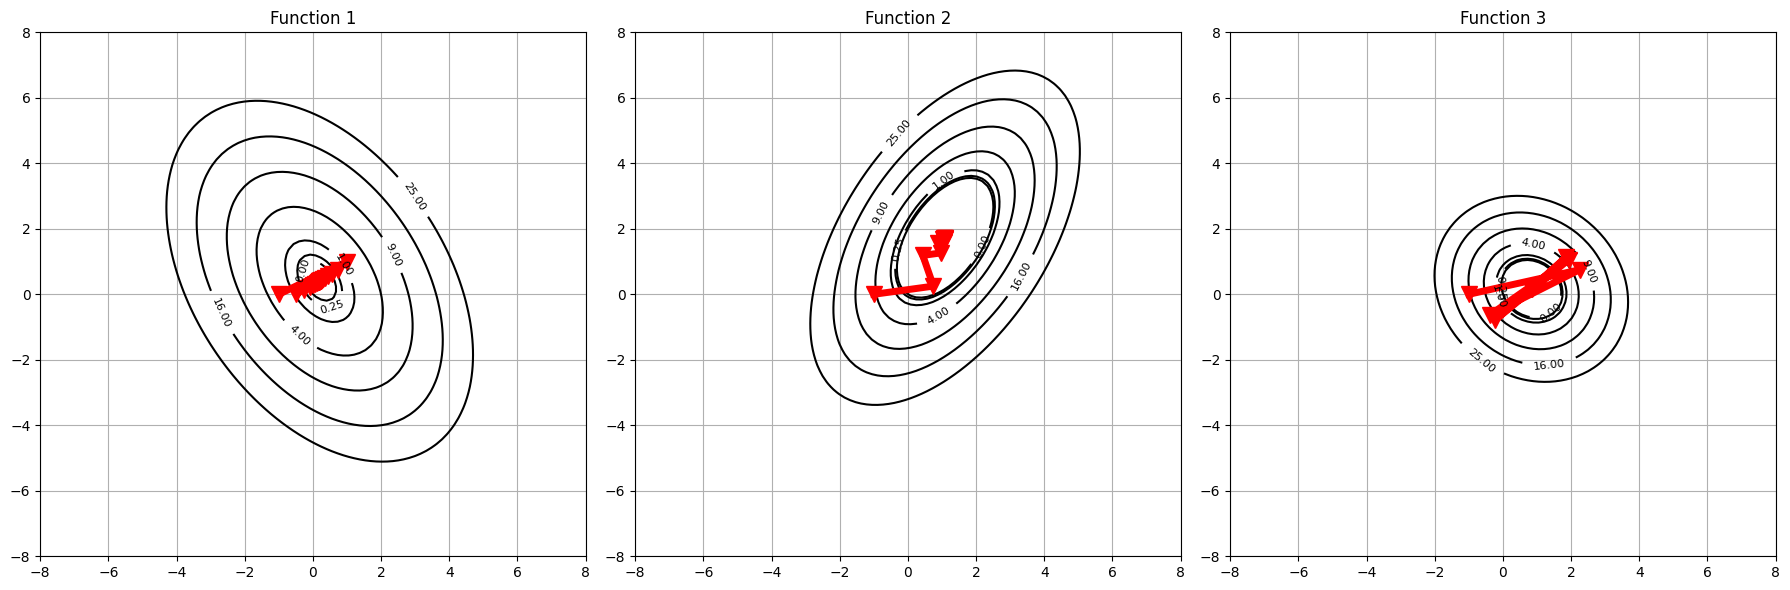

CPU times: total: 562 ms
Wall time: 1.08 s


In [146]:
%%time

x0 = np.array([-1, 0])
print('Рассмотрим функции и их сходимость в случае константной стратегии')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Armijo', 'c1': 1e-4, 'alpha_0': 1})

### Вульф

Возьмем начальную точку, которая находится далеко от искомого минимума на каждой из трех функций:

Рассмотрим функции и их сходимость в случае константной стратегии


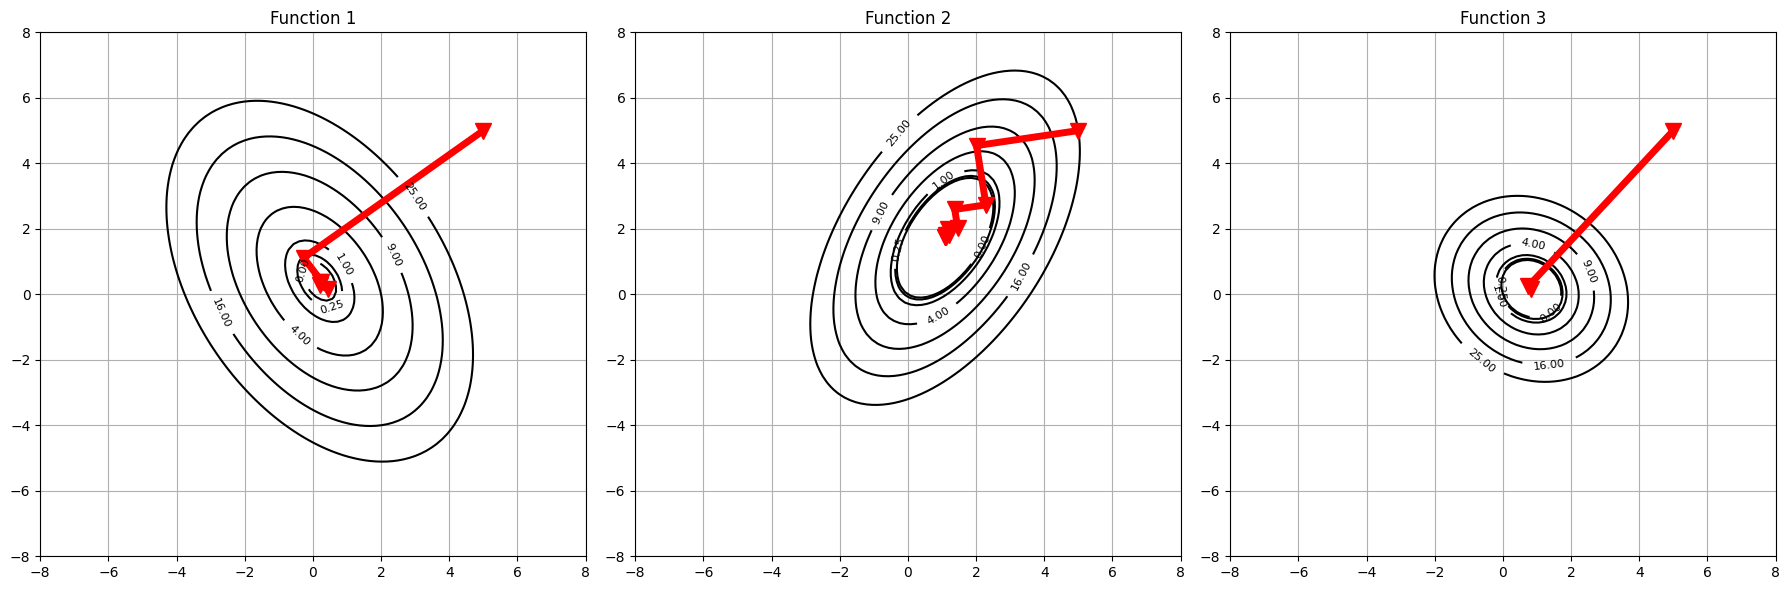

CPU times: total: 906 ms
Wall time: 2.01 s


In [147]:
%%time

x0 = np.array([5, 5])
print('Рассмотрим функции и их сходимость в случае константной стратегии')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Wolfe', 'c1': 1e-4, 'c2':0.9, 'alpha_0':1.0})

Теперь возьмем х0, приближенное к экстремуму:

Рассмотрим функции и их сходимость в случае константной стратегии


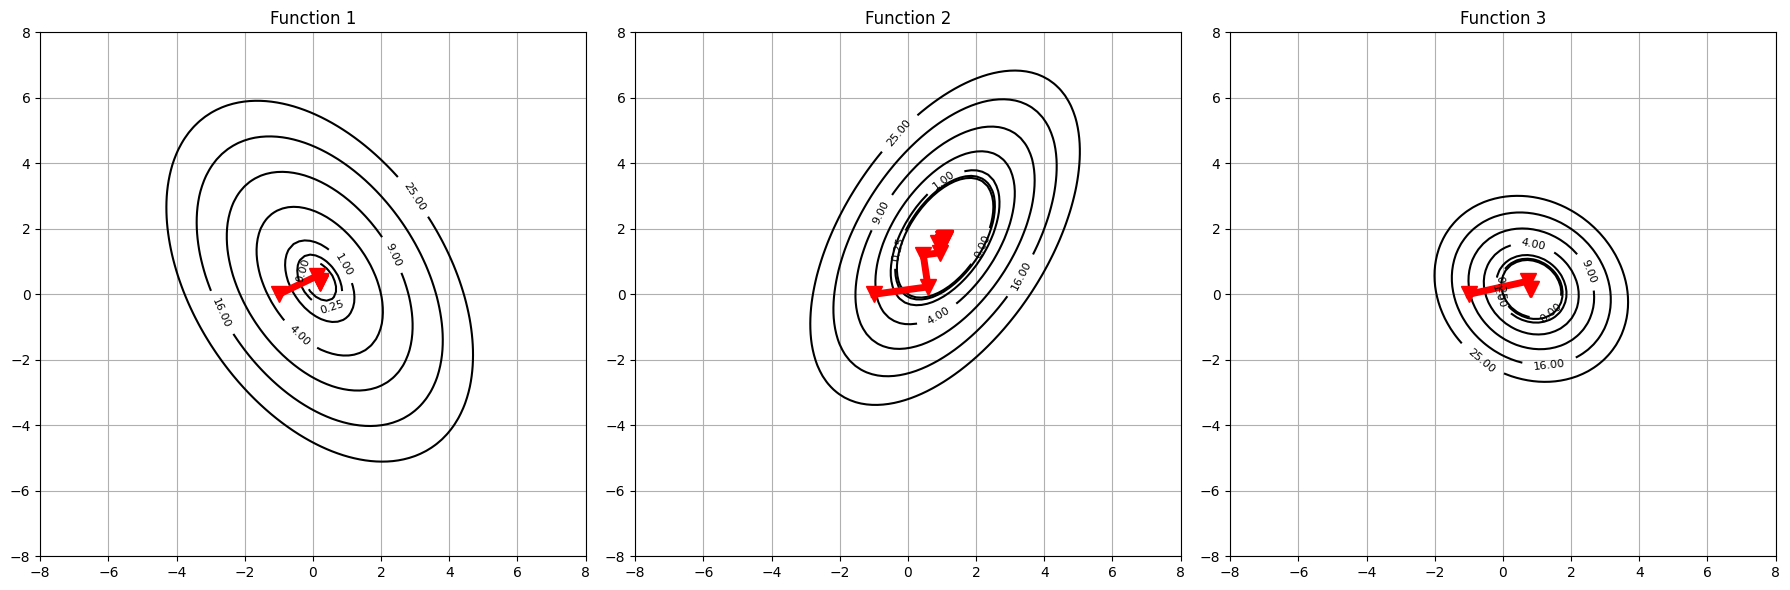

CPU times: total: 578 ms
Wall time: 1.01 s


In [148]:
%%time

x0 = np.array([-1, 0])
print('Рассмотрим функции и их сходимость в случае константной стратегии')
experiment1(A1, b1, A2, b2, A3, b3, x0, 10000, {'method': 'Wolfe', 'c1': 1e-4, 'c2':0.9, 'alpha_0':1.0})

### Выводы

Знаем про число обусловленности:
Для системы линейных уравнений вида Ax=b, число обусловленности A обозначается как $\kappa(A)$ и определяется как отношение максимальной нормы к минимальной норме: $\kappa(A) = ||A|| * ||A^{-1}||$

Для квадратной матрицы A число обусловленности можно вычислить с использованием собственных значений. Если $\lambda 1, \lambda 2, ... , \lambda n$ — собственные значения матрицы, то число обусловленности определяется как отношение максимального по модулю собственного значения к минимальному по модулю собственному значению: $\kappa (A) = \frac{\max | \lambda_i |}{\min | \lambda_i |}$


Числа обусловленности для наших примеров:

1) $\kappa(A_1) = \frac{max(4, 1)}{min(4, 1)} = 4$

1) $\kappa(A_2) = \frac{max(7, 1)}{min(7, 1)} = 7$

1) $\kappa(A_3) = \frac{max(7, 7)}{min(7, 7)} = 1$

Из графиков выше понимаем, что поведение градиентного спуска существенно зависит от следующих параметров:

1) **Число обусловленности**

Модем заметить, что чем выше число обусловленности матрицы A квадратичной функции, тем сложнее задача оптимизации и тем медленнее сходится метод градиентного спуска (требуется больше шагов)

2) **Начальная точка**

Выбор начальной точки сильно влияет на траекторию метода. Начало в точке, близкой к оптимуму, ускоряет сходимость.

3) **Стратегия выбора шага (константная, Армихо, Вульфа)**

Константную стратегию лучше применять для простых функций (для хорошо обусловленных задач), в противном случае алгоритму требуется много шагов для попадания в экстремум (видим это на 1ом и 2ом графиках).
Стратегия Армихо (адаптивный шаг) эффективнее для случаев, когда начальная точка не так далеко расположена от экстремума. 
Стратегия Вульфа стремится найти шаг, удовлетворяющий условиям Вульфа, полезна для задач с высоким числом обусловленности. Из графиков видим, что у данной стратегии шаги более шумные, но сходимость может достигаться быстрее.

## Эксперимент 2

В данном эксперименте исследуем зависимость числа итераций градиентного спуска от 

1) числа обусловленности
2) размерности пространства

In [11]:
def generate_diagonal_matrix(n, kappa):
    """
    Генерация диагональной матрицы размера n с числом обусловленности kappa.
    Диаг. эл-ты сгенерированы в пределах [1, k]; min(a) = 1, max(a) = k
    """
    eigenvalues = np.linspace(1, kappa, n)
    A = np.diag(eigenvalues)
    return A


def run_experiment(n_values, kappa_values, tolerance=1e-5, max_iter=1000):
    """
    n_values: список значений размерностей
    kappa_values: список значений чисел обусловленности
    """
    results = {}
    
    for n in n_values:
        results[n] = []
        for kappa in kappa_values:
            # Генерация случайной матрицы A и вектора b
            A = generate_diagonal_matrix(n, kappa)
            b = np.random.randn(n)
            
            # Определение оракула для квадратичной функции
            oracle = QuadraticOracle(A, b)
            
            # Запуск градиентного спуска
            x0 = np.random.randn(n)
            history = gradient_descent(oracle, x0, tolerance=tolerance, max_iter=max_iter, trace=True)[2]
            
            # Записываем результат - число итераций
            num_iterations = len(history['func'])
            results[n].append((kappa, num_iterations))
    
    return results

In [12]:
def plot_results(results, n_values, kappa_values):
    plt.figure(figsize=(10, 6))
    for n in n_values:
        iterations = [item[1] for item in results[n]]
        plt.plot(kappa_values, iterations, label=f'n={n}', marker='o')
    
    plt.xscale('log') # log-шкала оси абсцисс
    plt.xlabel('Число обусловленности (κ)')
    plt.ylabel('Число итераций')
    plt.title('Зависимость числа итераций от числа обусловленности и размерности пространства')
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

In [25]:
# Параметры эксперимента
n_values = [10, 50, 100, 1000, 5000, 10000]  # Размерности
kappa_values = [1, 10, 100, 1000, 10000]  # Число обусловленности

# Запуск эксперимента
results = run_experiment(n_values, kappa_values)

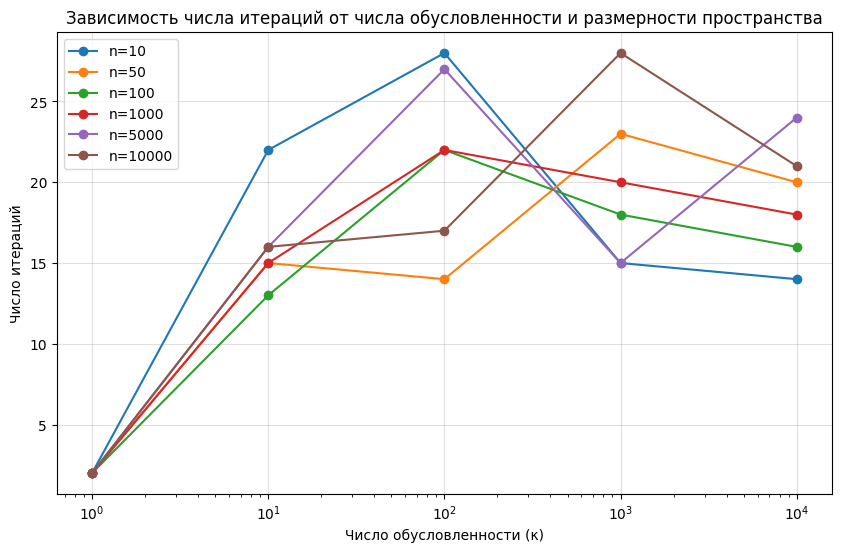

In [26]:
# Визуализация результатов
plot_results(results, n_values, kappa_values)

**Выводы**

1) Число итераций возрастает с увеличением числа обусловленности:
    На графике видно, что при небольших значениях числа обусловленности для всех измерений пространства требуется относительно меньшее число итераций для достижения сходимости. По мере увеличения числа обусловленности κ, количество итераций для всех n увеличивается, достигая максимума в точке ~ κ ≈ 100. Это говорит о том, что увеличение κ сначала затрудняет сходимость алгоритма, требуя большего числа итераций. Однако после достижения некоторого значения числа обусловленности (~100), график показывает снижение числа итераций для всех значений n, что указывает на улучшение сходимости алгоритма при очень больших значениях κ.

2) Размерность пространства влияет на поведение метода
    Заметим, что при меньших значениях n (например, n=10) число итераций быстро увеличивается с ростом κ, тогда как для более высоких n (например, n=5000, n=10000) график становится более сглаженным. Это говорит о том, что размерность пространства также влияет на число итераций, но этот эффект более выражен при небольших значениях n. При больших n число итераций становится менее зависимым от κ.

## Эксперимент 3

В данном эксперименте проведем сравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии

In [24]:
from sklearn.datasets import load_svmlight_file
from datetime import datetime


# Функция для запуска эксперимента
def run_experiment(data, method, regcoef, max_iter=100, tolerance=1e-5):
    """
    Функция для запуска эксперимента на одном наборе данных с одним методом оптимизации.
    dataset_path: путь к данным
    method: метод оптимизации (gradient_descent или newton)
    regcoef: коэффициент регуляризации
    max_iter: максимальное число итераций
    tolerance: порог сходимости
    
    Возвращает историю значений функции, норм градиента и времени.
    """
    # Загрузка данных
    X, y = data
    X = X.toarray()
    y = 2 * y - 1  # Преобразуем метки {0, 1} в {-1, 1}
    
    # Создаем оракул логистической регрессии
    oracle = create_log_reg_oracle(X, y, regcoef)
    
    # Начальная точка
    x0 = np.zeros(X.shape[1])
    
    # Запуск метода
    start_time = datetime.now()
    x_star, msg, history = method(oracle, x0, max_iter=max_iter, tolerance=tolerance, trace=True)
    
    # Добавляем временные метки к истории
    history['time'] = [t  for t in history['time']] 
    return history

In [25]:
def plot_experiment(histories, labels, title):
    """
    Функция для построения графиков зависимости функции и нормы градиента от времени.
    histories: список историй, возвращаемых методами
    labels: список меток для каждого метода
    title: заголовок графика
    """
    plt.figure(figsize=(14, 6))

    # График значений функции
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history['time'], history['func'], label=label)

    plt.xlabel('Время (с)')
    plt.ylabel('Функция потерь')
    plt.title(f'Значение функции для датасета {title}')
    plt.grid(alpha=0.3)
    plt.legend()

    # График норм градиента
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        grad_norm_ratio = np.array(history['grad_norm']) / history['grad_norm'][0]
        plt.plot(history['time'], grad_norm_ratio, label=label)
    plt.xlabel('Время (с)')
    plt.ylabel('Относительная норма градиента')
    plt.title(f'Норма градиента для датасета {title}')
    plt.grid(alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [26]:
# Параметры эксперимента
dataset_paths = [r"C:\Users\Desktop\ML\Logistic_regression_Optimization_in_ML\data\w8a.txt", 
                 r"C:\Users\Desktop\ML\Logistic_regression_Optimization_in_ML\data\gisette_scale\gisette_scale", 
                 r"C:\Users\Desktop\ML\Logistic_regression_Optimization_in_ML\data\real-sim\real-sim"]  # Путь к данным 

regcoef = lambda m: 1 / m  # Коэффициент регуляризации

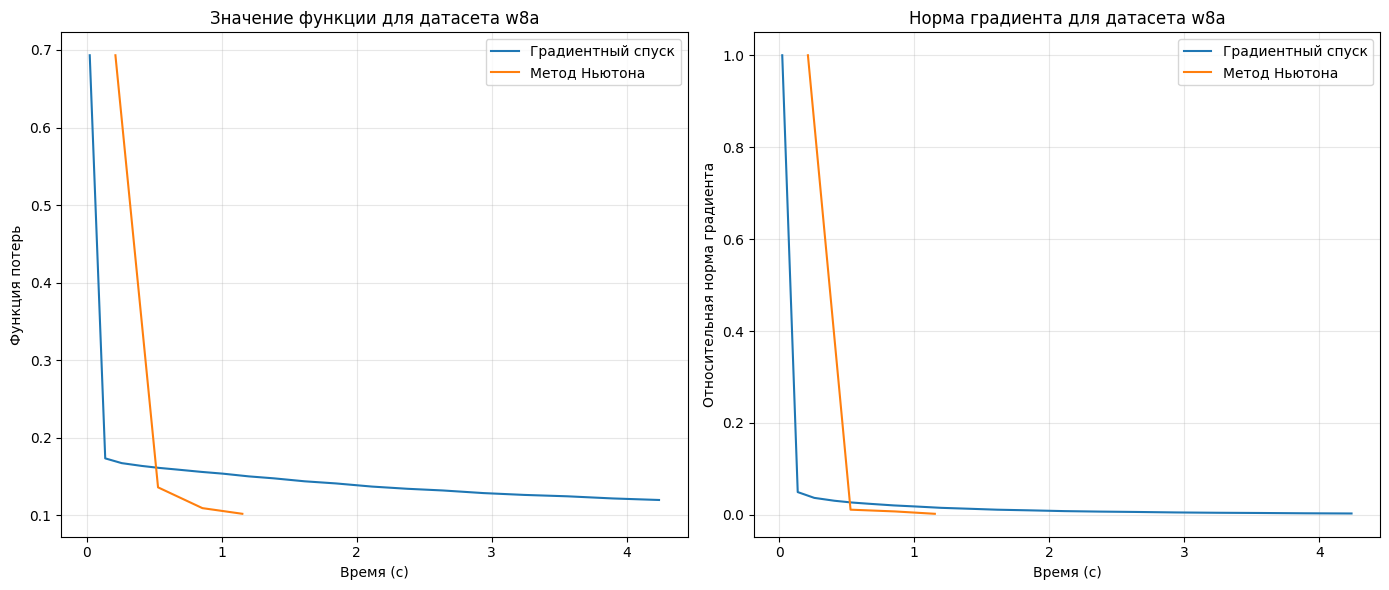

In [27]:
X_, y_ = load_svmlight_file(dataset_paths[0])
regcoef_value = regcoef(X_.shape[0])

# Запуск методов на наборе данных 
history_gd = run_experiment((X_, y_), gradient_descent, regcoef_value)
history_newton = run_experiment((X_, y_), newton, regcoef_value)

# Построение графиков
plot_experiment([history_gd, history_newton], ['Градиентный спуск', 'Метод Ньютона'], 'w8a')

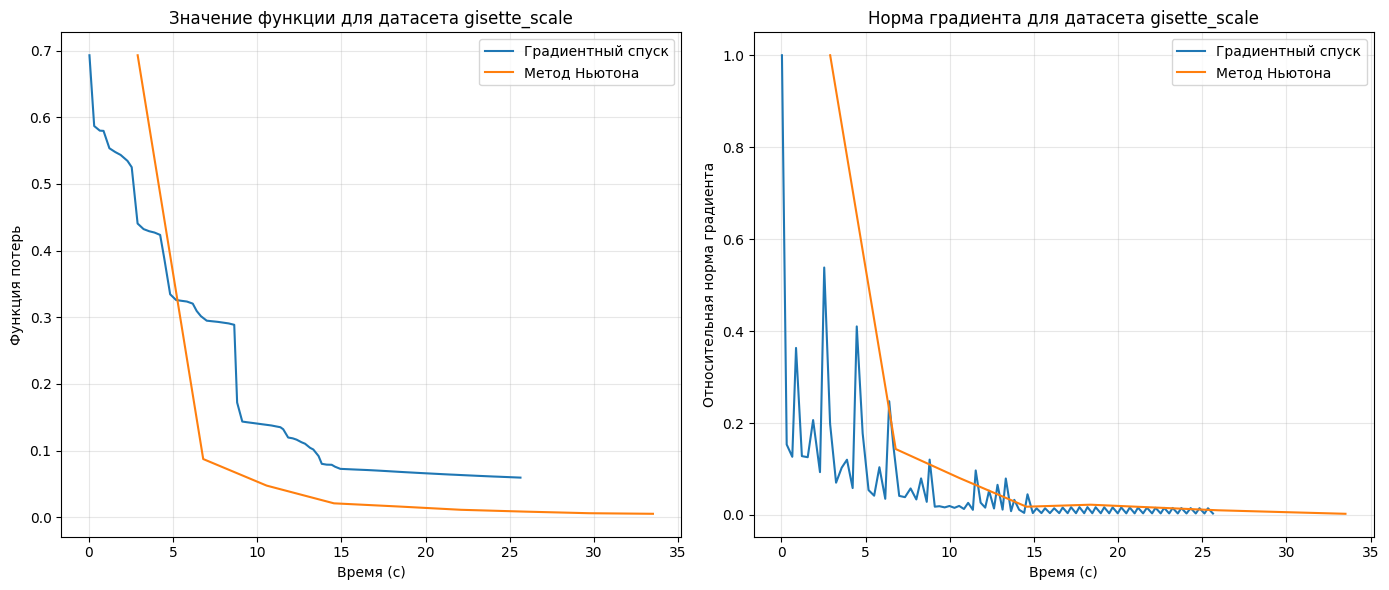

In [28]:
X_, y_ = load_svmlight_file(dataset_paths[1])
regcoef_value = regcoef(X_.shape[0])

# Запуск методов на наборе данных 
history_gd = run_experiment((X_, y_), gradient_descent, regcoef_value)
history_newton = run_experiment((X_, y_), newton, regcoef_value)

# Построение графиков
plot_experiment([history_gd, history_newton], ['Градиентный спуск', 'Метод Ньютона'], 'gisette_scale')

Для следующей части было решено взять подвыборку датасета 'real-sim' для снижения нагрузки на оперативную память:

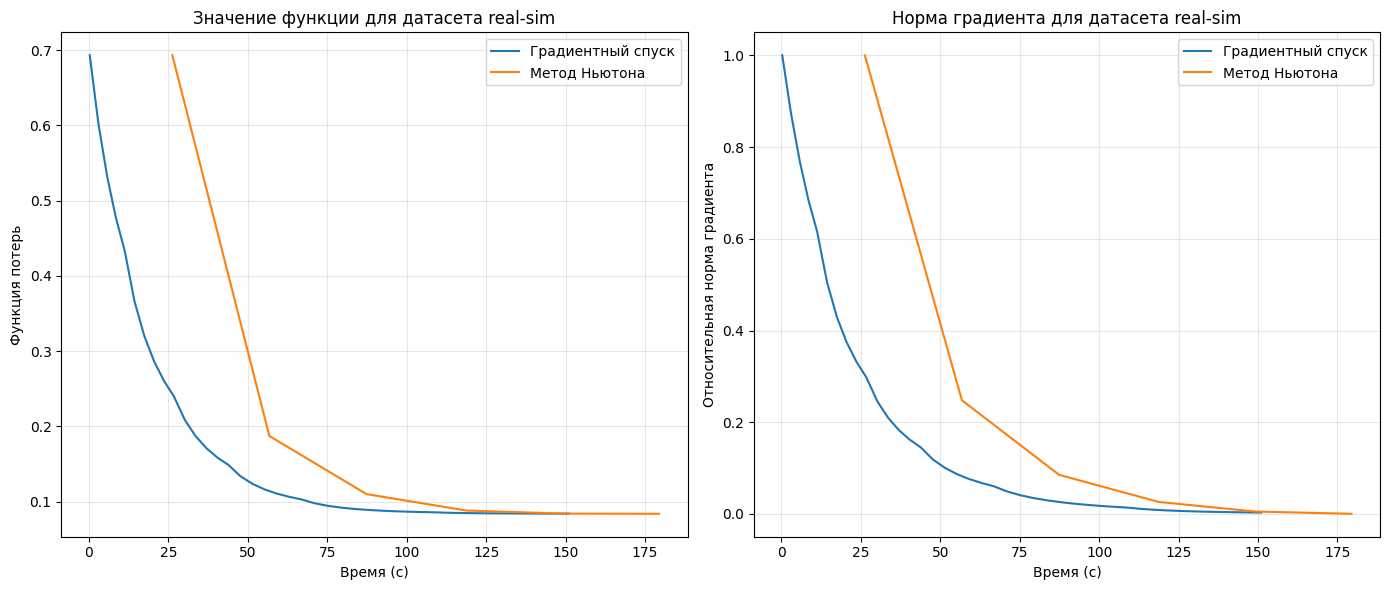

In [37]:
X_, y_ = load_svmlight_file(dataset_paths[2])
X_cut, y_cut = X_[:20000, :9000], y_[:20000]
regcoef_value = regcoef(X_cut.shape[0])

# Запуск методов на наборе данных 
history_gd = run_experiment((X_cut, y_cut), gradient_descent, regcoef_value)
history_newton = run_experiment((X_cut, y_cut), newton, regcoef_value)

# Построение графиков
plot_experiment([history_gd, history_newton], ['Градиентный спуск', 'Метод Ньютона'], 'real-sim')

**Выводы:**

1) Оценка стоимости итерации

    * Градиентный спуск
        
        **Стоимость одной итерации:** В каждой итерации градиентного спуска необходимо вычислить градиент функции потерь, который включает вычисление суммы по всем объектам выборки. Для этого потребуется 𝑂(𝑚𝑛) операций, так как градиент вычисляется по каждому из 𝑛 параметров для 𝑚 объектов

        **Требования к памяти:** Градиентный спуск хранит текущее приближение для вектора параметров и градиент. Память, необходимая для этого, составляет 𝑂(𝑛)

    * Метод Ньютона

        **Стоимость одной итерации:** Метод Ньютона требует вычисления как градиента, так и Гессиана (второй производной функции потерь). Стоимость вычисления градиента по-прежнему составляет 𝑂(𝑚𝑛), но теперь необходимо также вычислить Гессиан, что требует $𝑂(𝑚𝑛^2)$ операций, поскольку Гессиан — это матрица размера 𝑛×𝑛. Дополнительно метод Ньютона требует инвертирования матрицы Гессиана, что стоит $𝑂(𝑛^3)$

        **Требования к памяти:** Метод Ньютона требует хранения Гессиана, что требует $𝑂(𝑛^2)$ памяти, а также текущего приближения для вектора параметров и градиента, что требует 𝑂(𝑛) памяти


2) Метод Ньютона vs Градиентный спуск

    Метод Ньютона значительно быстрее достигает минимального значения функции потерь и нормы градиента. Градиентный спуск, напротив, демонстрирует скачки на графике нормы градиента, что может указывать на нестабильность или более сложную оптимизацию. Однако на более поздних итерациях градиентный спуск постепенно догоняет Ньютона по качеству.

    Можно сказать, что метод Ньютона лучше подходит для задач, где важна быстрая сходимость, особенно на небольших данных или при небольших затратах на вычисления Гессиана. Градиентный спуск оказывается более стабилен на длинных промежутках времени, несмотря на начальную медленную сходимость. Он может быть предпочтительнее для задач с очень большой размерностью пространства, где вычисление Гессиана в методе Ньютона становится слишком затратным (по времени и по памяти).

    Демонстрацию описанного выше видим на приведенных графиках.